<a href="https://colab.research.google.com/github/visualhan/ComputerVision_Colab/blob/main/7%EA%B0%95_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%95%84%ED%84%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##03 샤프닝 필터(Sharping Filter)
* 이미지의 경계를 더 선명하게 하는 효과
* 경계 검출하기 위해 픽셀 값의 변화가 갑자기 크게 일어나는 지점을 찾음
  * 연속된 픽셀 값에 미분 연산으로 구함
  * 이미지의 픽셀 데이터는 연속된 공간이 아니기 때문에 이산화 시켜서 근사값으로 간소화 함<p>
  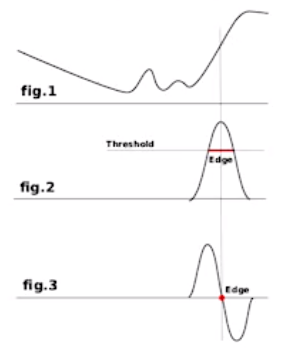

  * fig.1 픽셀의 색의 명암(0-255)을 나타냄
    * 왼쪽의 경사가 완만한 구간은 테두리가 아님
    * 오른쪽의 경사가 가파른 곳이 경계
  * fig.2 1차 미분(the first derivative) : 픽셀의 명암이 바뀌는 속도
    * 임계점을 넘는 구간을 경계라고 지정할 수 있음
    * 실제 경계는 커브의 가장 상단 구간이지만 임계를 넘으면 경계로 지정하기 떄문에 다양한 경계선의 대부분이 두꺼워질 수 있음.
    * 소벨 필터가 대표적
  * fig3. 2차 미분(the second derivative) : 픽셀의 명암이 바뀌는 속도가 가장 빠른 구간을 0
    * 1차 미분 커브의 가장 상단 부분들이 0으로 나타남
    * 2차 미분 경계가 한 픽셀로 표현되어 경계를 얇은 선들로 표시 가능
    * 대신 노이즈에 민감하기 떄문에 경계가 아닌 부분도 경계로 표현될 수 있음
    * 라플라시안 필터(Laplacian edge detection)가 대표적
  * 경계선을 도출하기 전에 블러 필터를 적용하면 더 좋은 결과가 나옴

###03.1 기본 미분 필터
* 컨볼루션 커널로 표현한 미분 연산
* 각각 X 축과 Y축 방향으로 근접 픽셀에서 현재 픽셀 값을 뺌<p>
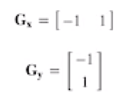

In [1]:
# 구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


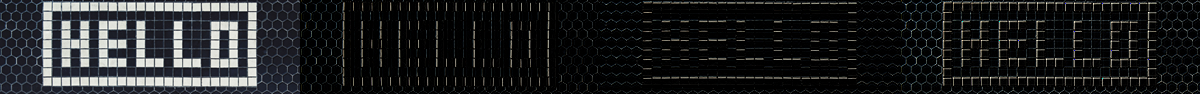

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png')

gx_kernel = np.array([[ -1,1]])
gy_kernel = np.array([[ -1],
                      [1]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)  # -1은 입력 이미지와 출력 이미지의 dtype이 같다.
edge_gy = cv2.filter2D(img, -1, gy_kernel)

merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
cv2_imshow(merged)

# x 필터, y 필터, x+y 필터를 적용한 이미지
# x 커넬 적용 이미지 : x 방향으로 가면서 경계의 변화를 표시하기 떄문에 경계가 세로선처럼 보인다

###03.2 로버츠 교차 필터
* 기본 미분 커넬을 개선한 커넬
* 대각선 방향으로 사선 경계 검출 효과를 높임
* 노이즈에 민감하고 엣지 강도가 약함
* 실무에서는 사용하지 않음<p>
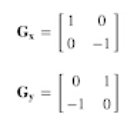

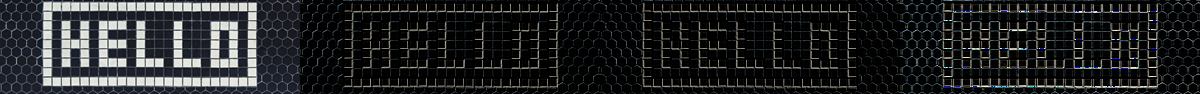

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png')

gx_kernel = np.array([[ 1, 0],
                      [ 0,-1]])
gy_kernel = np.array([[ 0, 1],
                      [-1, 0]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)  # -1은 입력 이미지와 출력 이미지의 dtype이 같다.
edge_gy = cv2.filter2D(img, -1, gy_kernel)

merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
cv2_imshow(merged)

# 기본 미분 필터보다 사선 경계가 표출된 것을 볼 수 있다.

In [ ]:
###03.3 프리윗 필터
* 각 방향으로 차분을 세 번 계산 하도록 배치
* 엣지 강도가 강하고 수직과 수평 엣지를 동등하게 찾음
* 대각선 검출에는 약함
* 실무에서는 사용하지 않음


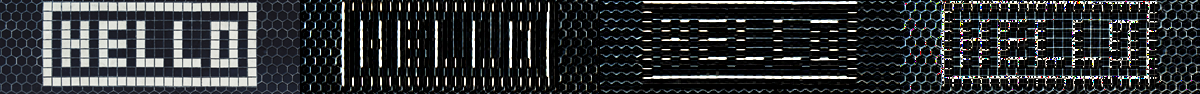

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png')

gx_kernel = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])
gy_kernel = np.array([[-1,-1,-1],
                      [ 0, 0, 0],
                      [ 1, 1, 1]])

edge_gx = cv2.filter2D(img, -1, gx_kernel)  # -1은 입력 이미지와 출력 이미지의 dtype이 같다.
edge_gy = cv2.filter2D(img, -1, gy_kernel)

merged = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
cv2_imshow(merged)

###03.4 소벨 필터
* **중심 픽셀의 차분 비중을 두 배**로 주고, 수평, 수직, 대각선 경계 검출에 모두 강한 마스크 제안
* 대표적인 1차 미분 마스크
* 커넬의 크기가 작은 경우 혹은 크더라도 중심에서 멀어질수록 엣지 방향성의 정확도가 떨어짐

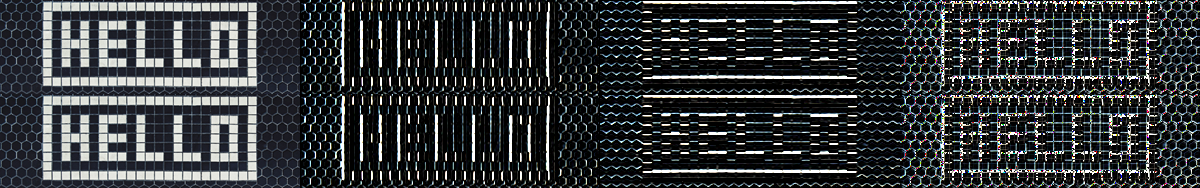

In [6]:
# 1차 미분 마스크로는 제일 많이 쓰임.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png')

gx_k = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])
gy_k = np.array([[-1,-2,-1],
                      [ 0, 0, 0],
                      [ 1, 2, 1]])

edge_gx = cv2.filter2D(img, -1, gx_k)  # -1은 입력 이미지와 출력 이미지의 dtype이 같다.
edge_gy = cv2.filter2D(img, -1, gy_k)

# 소벨 OpenCV API
# cv2.Sobel(입력 이미지, 출력 영상의 dtype, dx, dy의 미분 차수(0,1,2) 둘 다 0은안됨, ksize(=커넬사이즈)는 (1,3,5,7 중 선택))
sobelx = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv2.Sobel(img, -1, 0, 1, ksize=3)

merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((img, sobelx, sobely, sobelx+sobely))
merged = np.vstack((merged1, merged2))
cv2_imshow(merged)

# 대각선 방향으로도 잘 검출되었다.

###03.5 샤르 필터
* 소벨 필터의 정확도를 개선한 필터

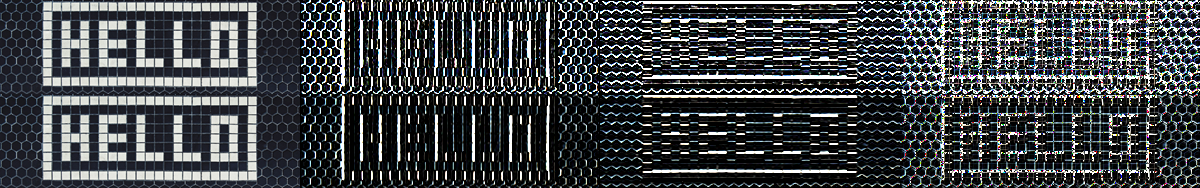

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png')

gx_k = np.array([[ -3, 0, 3],
                 [-10, 0, 10],
                 [ -3, 0, 3]])
gy_k = np.array([[-3,-10,-3],
                 [ 0,  0, 0],
                 [ 3, 10, 3]])

edge_gx = cv2.filter2D(img, -1, gx_k)  # -1은 입력 이미지와 출력 이미지의 dtype이 같다.
edge_gy = cv2.filter2D(img, -1, gy_k)

# 샤르 OpenCV API
scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)

merged1 = np.hstack((img, edge_gx, edge_gy, edge_gx+edge_gy))
merged2 = np.hstack((img, sobelx, sobely, sobelx+sobely))
merged = np.vstack((merged1, merged2))
cv2_imshow(merged)

###03.6 라플라시안 필터
* 대표적인 2차 미분 필터
* 2차 미분을 하면 더 정확한 경계 검출이 가능
* 라플라시안 필터는 노이즈에 민감해서 가우시안 필터로 노이즈를 제거하고 사용하면 좋음

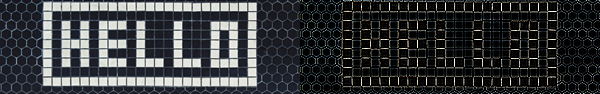

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png')

edge = cv2.Laplacian(img, -1)

# 결과
merged = np.hstack((img, edge))
cv2_imshow(merged)
# 더 얇은 경계를 표시

###03.7 케니 엣지 검출 필터
* 경계 검출 결과가 뛰어나 가장 많이 쓰이는 함수
* 한 가지 필터를 사용하는 것이 아니라 **4단계 알고리즘**을 적용해 노이즈에 강한 엣지 검출기
  1. 노이즈 제거(Noise Resuction) : 5x5 가우시안 블러링 필터로 노이즈 제거
  2. 경계 그레디언트 방향 계산 : 소벨 필터로 경계 및 그레디언트 방향 검출
  3. 비최대치 억제(No-Maximun Suppression) : 그레디언트 방향에서 검출된 경계 중 가장 큰 값만 선택하고 나머지는 제거
  4. 이력 스레시홀팅(Hysteresis Thresholding) : 두 개의 경계 값(Max, Min)을 지정해서 경계 영역에 있는 픽셀들 중 큰 경계값(Max) 밖의 픽셀과 연결성이 없는 픽셀 제거
* 스레시홀드 값의 지정에 따라 경계 검축 대상을 조정할 수 있음<p>
* (Min, Max 사이의 경계값 안에 있는 픽셀은 제거 되거나 경계로 인정되어 표시될 수 있다.)


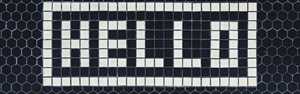

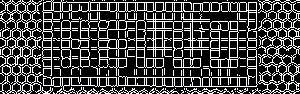

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png')

# cv2.Canny(이미지, 스레시홀드, 최소/최대값)
edge = cv2.Canny(img, 100, 200)

# 결과
cv2_imshow(img)
cv2_imshow(edge)
# 경계선이 아주 잘 출력된다.

##04 모폴로지(morphology)
모폴로지는 '형태학'을 뜻함
* 이미지의 노이즈 제거, 구멍 채우기, 끊어지 선 이어 붙이기 등에 쓰이는 형태학적 연산
* 모폴로지 연산은 보통 검은색과 흰색으로만 구성되어 있는 바이너리 이미지나 그레이스케일 이미지에 적용
* 모폴로지 4가지 연산 : 침식, 팽창, 열림, 닫힘

###04.1 침식(erosion) 연산
* 이미지의 형태를 깎아 내는 연산
* 구조화 요소 커널(structuring element kernel) : 0과 1로 구성된 커널
  * 1이 채워진 모양에 따라 사각형, 타원형, 십자형 등으로 사용 가능
  * 구조화 요소 커넬이 이미지의 형태 위에 완전히 포함되지 않는 부분을 0으로 변경
* 어두운 부분의 노이즈를 제거하는 효과
* 원본보다 얇게 변형되는 효과

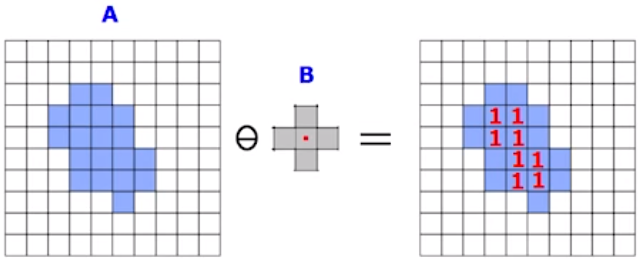

* 원본 이미지에서 B가 포함된 영역만 1로 표시함.

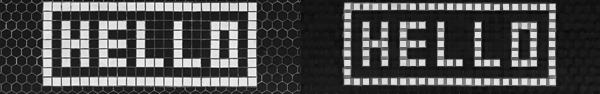

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널과 사각형(3x3) 생성
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

erosion = cv2.erode(img, k)

merged = np.hstack((img, erosion))
cv2_imshow(merged)

# 3x3 커널을 돌려서 포함되면 남기고, 포함되지 않으면 지운다.
# 글자와 박스 타일이 작아졌다.

###04.2 팽창(dilatation) 연산
* 이미지의 형태 주변을 확장하는 연산
* 구조화 요소 커넬이 이미지의 형태 위에 완전히 포함되지 않는 부분을 1로 변경
* 밝은 부분의 노이지를 제거하는 효과
* 원본보다 두꺼워지는 변형이 생김
* B 이미지의 중간 빨간 픽셀이 있는 부분이 원본 이미지를 순환하면서 경계를 확장 시킨다.

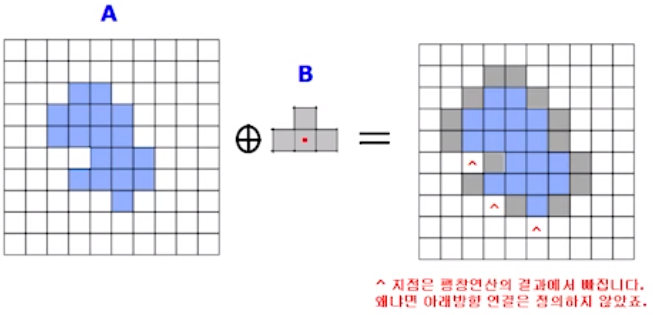

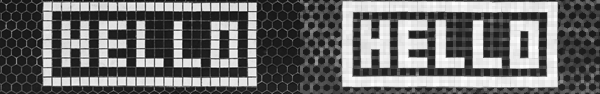

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널과 사각형(3x3) 생성
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

dst = cv2.dilate(img, k)

merged = np.hstack((img, dst))
cv2_imshow(merged)

# 경계가 두꺼워졌다.

###04.3 열림(opening) 연산
**열림 = 침식 + 팽창**
* 침식 연산 후 팽창 연산을 적용
* 주변보다 밝은 노이즈를 제거하는데 효과적
* 맞닿아 있는 독립된 개체를 분리하거나 돌출된 모양을 제거하는데 효과적

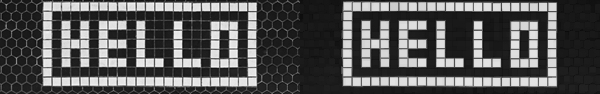

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널과 사각형(5x5) 생성
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)

merged = np.hstack((img, opening))
cv2_imshow(merged)

# 주변보다 밝은 노이즈가 제거됨.(배경)

###04.3 닫힘(closing) 연산
**닫힘 = 팽창 + 침식**
* 팽창 연산 후 침식 연산을 적용
* 닫힘 연산을 주변보다 어두운 노이즈를 제거하는데 효과적
* 끊어져 보이는 개체를 연결하거나 구멍을 메우는데 효과적

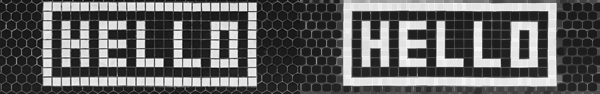

In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/hellotile_300x94.png', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널과 사각형(5x5) 생성
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, k)

merged = np.hstack((img, closing))
cv2_imshow(merged)

# hello의 타일이 연결된 것처럼 보인다.